# *Offline Handwritten Text Recognition*

### The purpose of this notebook is to give a brief idea and a basic approach for offline handwritten text recognition by using segmentation and classification. 

## What is Offline Handwritten Text Recognition?
Offline handwriting recognition involves the automatic conversion of text in an image into letter codes that are usable within computer and text-processing applications. In simple terms, it is the text extraction from your handwritten notebooks/pages. Why called offline? The point being that there is an online text recognition system, which is referred for text that is digitally generated by using tools like stylus, apple pencil, etc.

[](http://)## Approach

* **Step1** :  Build a digit(0-9) + A-Z characters classifier using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

Data : 

https://www.kaggle.com/datasets/landlord/handwriting-recognition/



https://www.kaggle.com/datasets/vaibhao/handwritten-characters/



Code : 

https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr

In [52]:
!pip install imutils

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [53]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tqdm import tqdm

In [54]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in tqdm(os.listdir(dir)):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 2000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

100%|██████████| 39/39 [06:15<00:00,  9.63s/it]


In [55]:
len(train_data)

70000

In [56]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in tqdm(os.listdir(val_dir)):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 500:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

100%|██████████| 39/39 [00:45<00:00,  1.17s/it]


In [57]:
len(val_data)

11209

In [58]:
random.shuffle(train_data)
random.shuffle(val_data)

In [59]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [60]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [61]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [62]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [63]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [64]:
print(train_X.shape,val_X.shape)

(70000, 32, 32, 1) (11209, 32, 32, 1)


In [65]:
print(train_Y.shape,val_Y.shape)

(70000, 35) (11209, 35)


In [66]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [68]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [69]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.8239 - accuracy: 0.7430 - val_loss: 0.3952 - val_accuracy: 0.8810
Epoch 2/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.4179 - accuracy: 0.8602 - val_loss: 0.3397 - val_accuracy: 0.8843
Epoch 3/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.3568 - accuracy: 0.8801 - val_loss: 0.3160 - val_accuracy: 0.9006
Epoch 4/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.3220 - accuracy: 0.8900 - val_loss: 0.2924 - val_accuracy: 0.8990
Epoch 5/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2995 - accuracy: 0.8966 - val_loss: 0.2864 - val_accuracy: 0.9047
Epoch 6/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2792 - accuracy: 0.9036 - val_loss: 0.2717 - val_accuracy: 0.9051
Epoch 7/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2649 - accuracy: 0.9072 - val_loss: 0.2661 - val_accuracy:

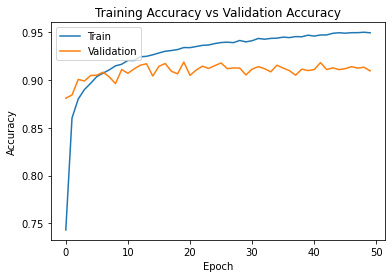

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

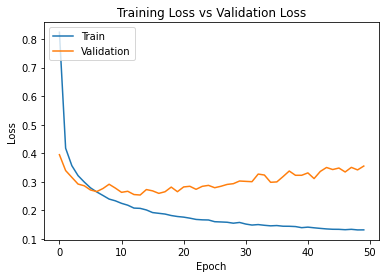

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [72]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [73]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [74]:
def get_word(letter):
    word = "".join(letter)
    return word

NWLHARANDAS11


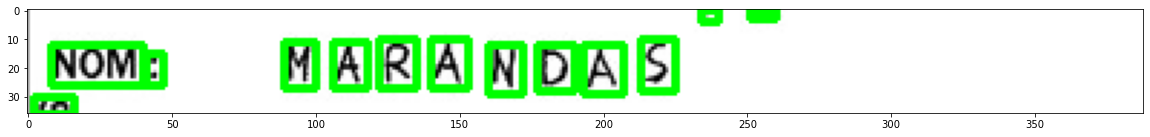

In [75]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,10))
    plt.imshow(image)
except : 
    pass

RMYAPLHYAYEL1JILUL61


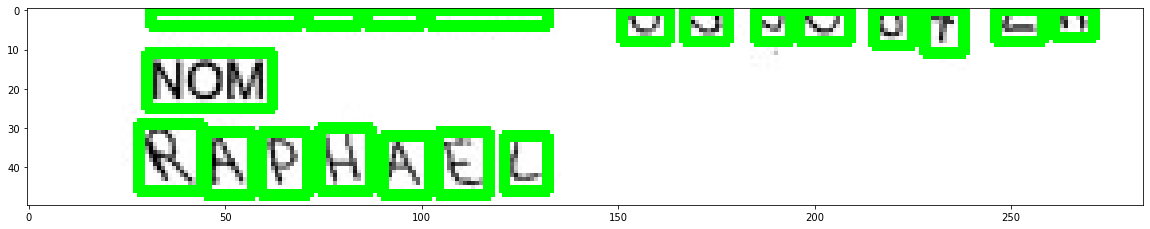

In [76]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

MERLE


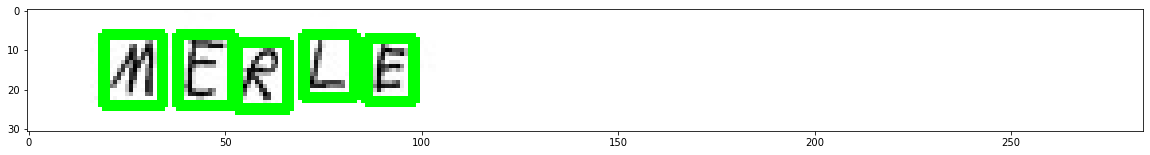

In [77]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

N0A


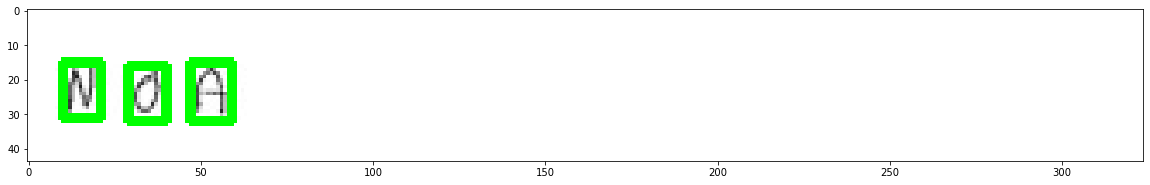

In [78]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

LWM0RMFNTYVJYYY6N


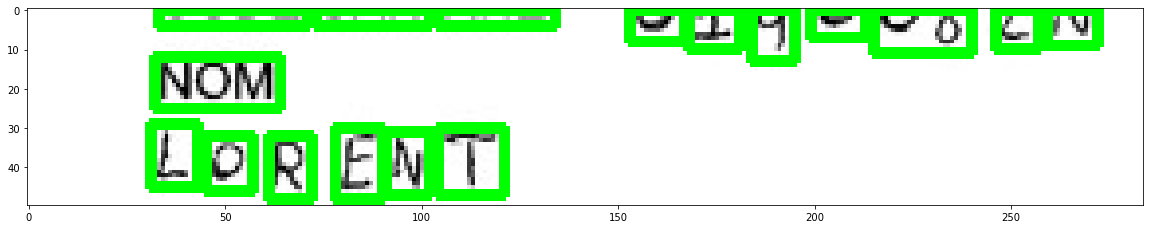

In [79]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

MWG0


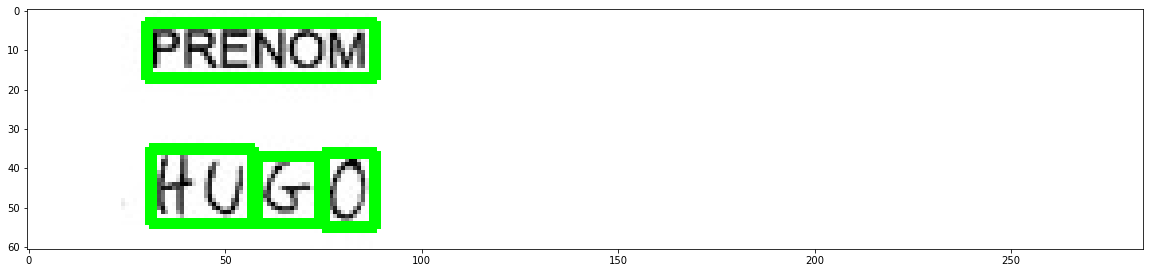

In [80]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

In [81]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

YUAHFCZ


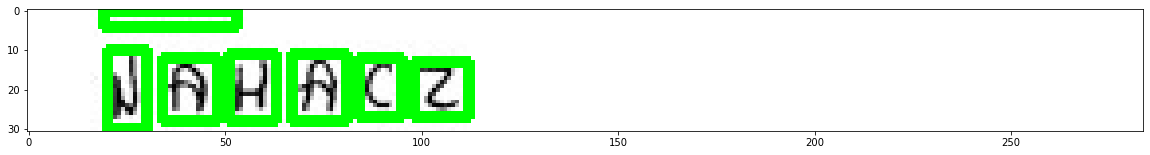

In [82]:
try : 
    letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
    word = get_word(letter)
    print(word)
    fig, ax = plt.subplots(figsize=(20,6))
    plt.imshow(image)
except : 
    pass

CHARLTNE


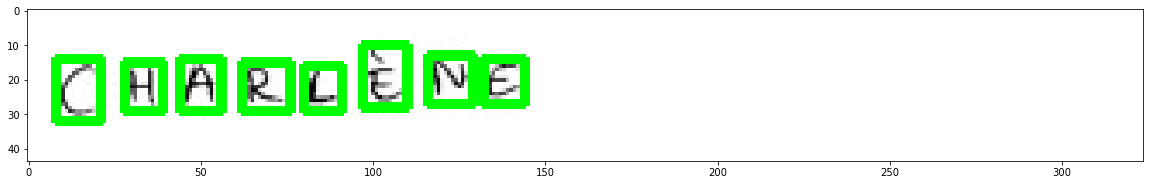

In [84]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

KFLLY


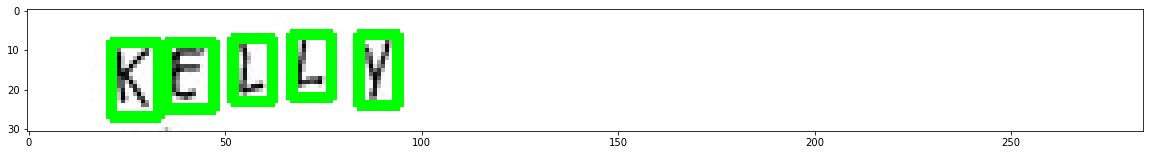

In [85]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

MC8RUNEL1NE


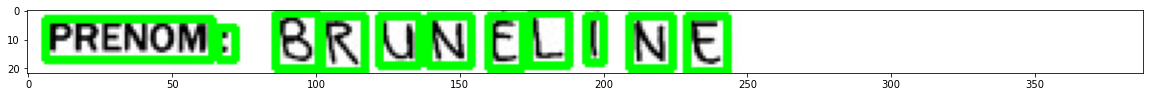

In [86]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

YELYF


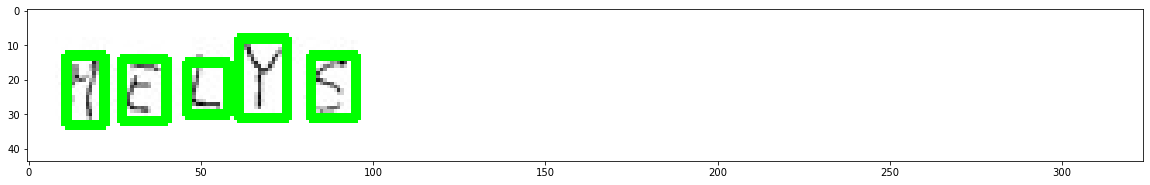

In [87]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

HRFHJR


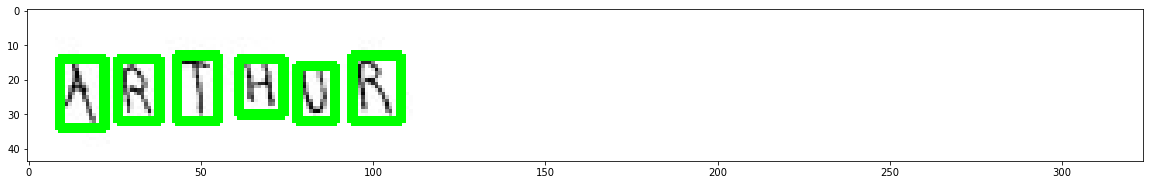

In [88]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

H1LLARYIAL1CF


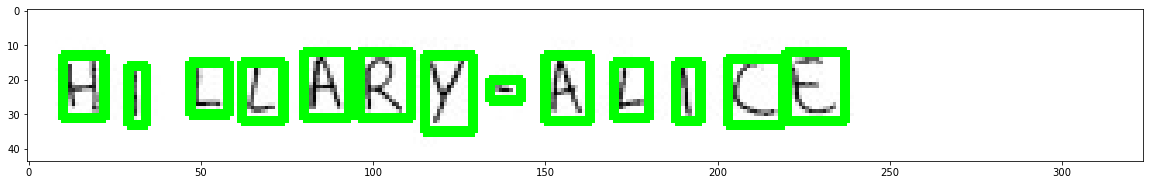

In [83]:
letter,image = get_letters(os.path.join("../input/handwriting-recognition/test_v2/test", np.random.choice(os.listdir("../input/handwriting-recognition/test_v2/test")) ))
word = get_word(letter)
print(word)
fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(image)

## Drawbacks
1. The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
2. There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
3. This model will not work for connected texts like a cursive handwritten word.

## Conclusion 
This notebook is an illustration of how a character segmentation and classification approach can be used for offline handwritten text extraction. In order to improve the model, the model should be trained on the complete dataset, this notebook was trained on slightly less number of images due to session constraints. Also, for applying this method to a complete paragraph, following approach can be used, **line segmentation >> word segmentation >> character segmentation >> classification >> post-processing**. 

## References
1. [https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/](http://) 
2. [https://www.pyimagesearch.com/2015/04/20/sorting-contours-using-python-and-opencv/](http://)

If you liked this notebook, then do **Upvote** as it will keep me motivated in creating such kernels ahead. **Thanks!!**